<a href="https://colab.research.google.com/github/dulce-bits/tarea2_RP/blob/master/tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dulce Celeste Cruz Ramírez

8vo Semestre ITCG

Reconocimiento de patrones

#Clasificación

La clasificación se puede definir como el proceso de predecir respuestas cualitativas para una o varias observaciones, que involucra asignar a estas observaciones a una clase o categoria. Algunos métodos de clasficación primero predicen la probabilidad para cada una de las categorias de una variable cualitativa como base para hacer la clasificación. En un sentido se podría decir que también se comportan hasta cierto punto como métodos de regresión.


Considere el conjunto de datos Weekly el cual es similar al conjunto de datos Smarket, excepto que el primero, respectivamente, contiene un registro de 1,089 semanas para 21 años (de inicios de 1990 a finales de 2010) del indice S&P 500, mostrando porcentajes del redimiento del mercado semana a semana.

Para cada registro se tienen los predictores Lag1, Lag2, Lag3, Lag4 y Lag5 que representan el rendimiento para cada una de las semanas anteriores respectivamente. Tambien se tiene el predictor Volume que representa el promedio de transacciones realizadas. Today representa el rendimiento de esa semana y Direction es una variable cualitativa que indica si el mercado tuvo un rendimiento positivo o negativo en dada semana.

**(a) Obtenga información estadística y gráfica acerca del conjunto de datos. ¿Existe algún patrón?**

En el siguiente código se muestra una descripción de datos estadisticos como tendencia central, dispersión y promedio del conjunto de datos.
Se puede observar que los datos son dispersos y no hay un pratrón significativo que se pueda reconocer con estos datos.


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import sklearn.linear_model as lm
import sklearn.discriminant_analysis as da
import sklearn.neighbors as nb
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

url='https://raw.githubusercontent.com/dulce-bits/tarea2_RP/master/Weekly.csv'

df = pd.read_csv(url)

df=df.drop('Year', axis=1)

df.describe()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


A continuación se grafican las relaciones de los predictores Lag1 - Lag5 con Volume con el objetivo de ilustrar el comportamiento de los datos. Las instancias de color rojo son Up y las de color azul son Down.

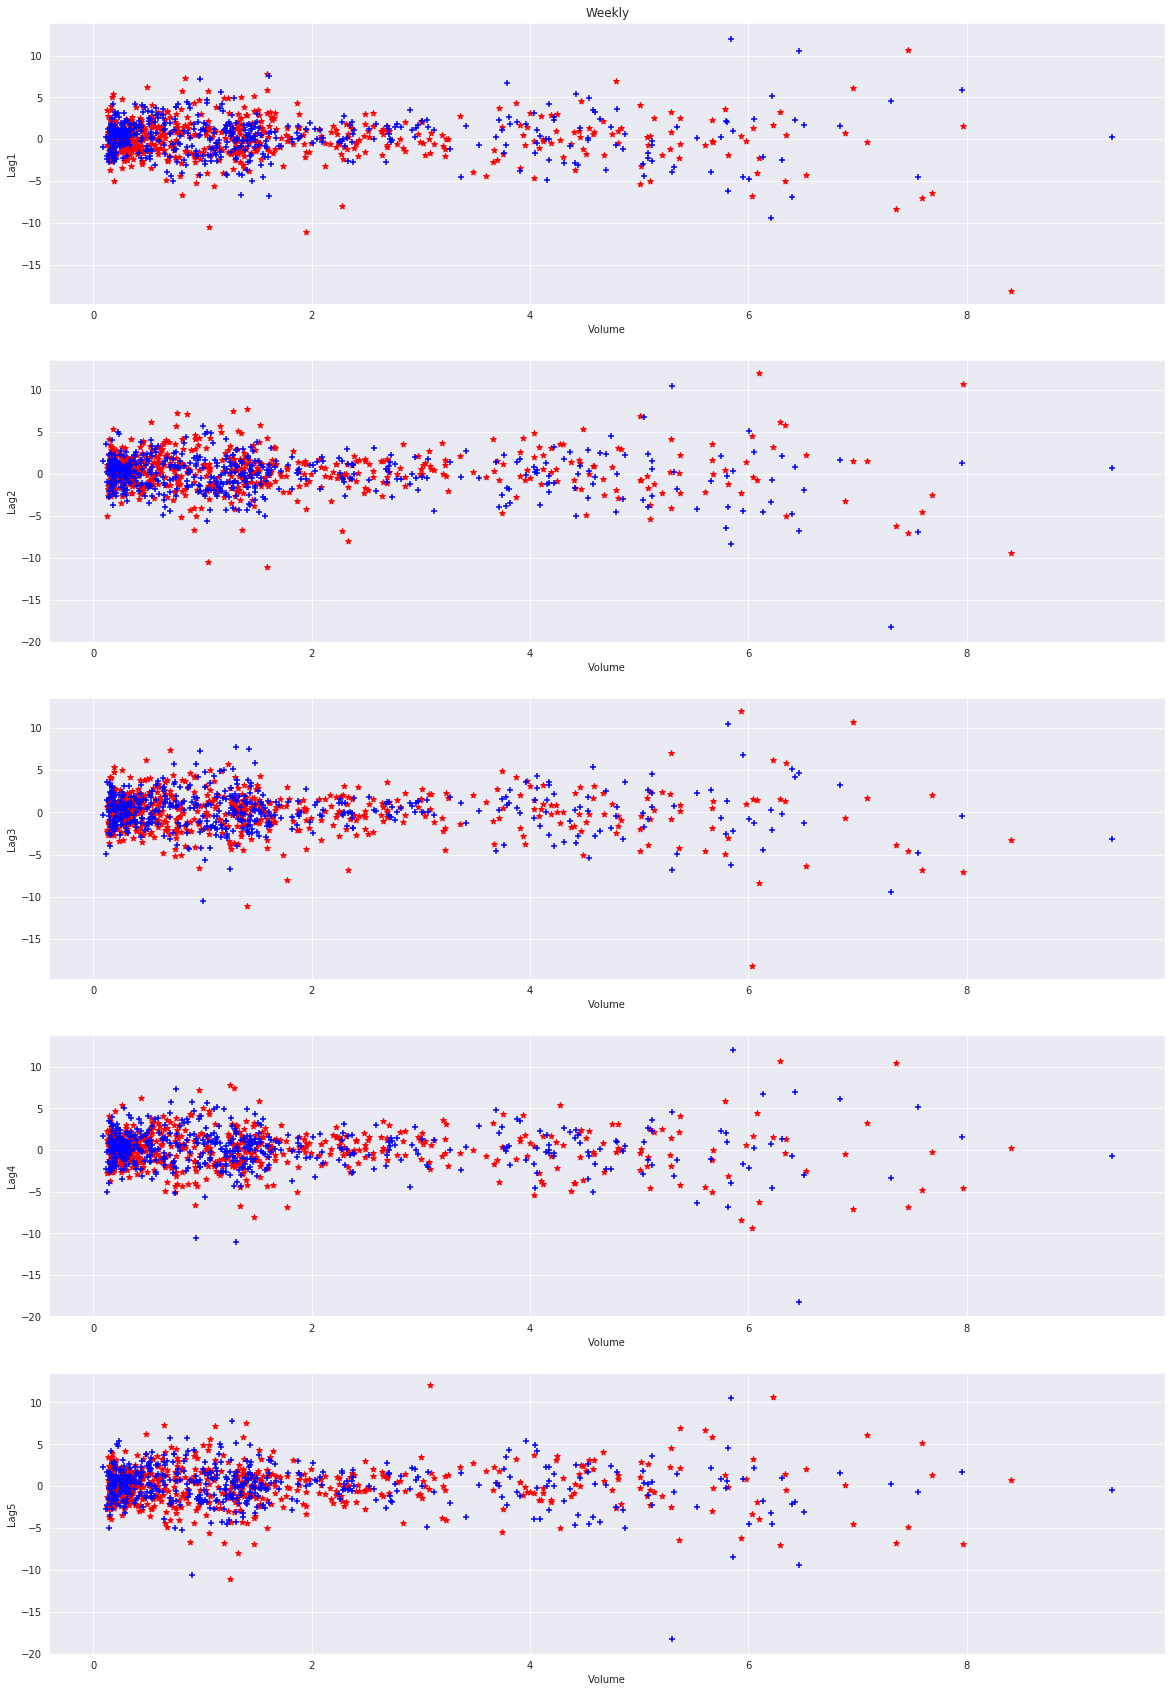

In [0]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(20, 30))
plt.clf()
plt.subplot(5,1,1)
plt.scatter(df[df.Direction=='Up'].Volume, df[df.Direction=='Up'].Lag1, color='red', marker='*')
plt.scatter(df[df.Direction=='Down'].Volume, df[df.Direction=='Down'].Lag1, color='blue', marker='+')
plt.title('Weekly')
plt.ylabel('Lag1')
plt.xlabel('Volume')

plt.subplot(5,1,2)
plt.scatter(df[df.Direction=='Up'].Volume, df[df.Direction=='Up'].Lag2, color='red', marker='*')
plt.scatter(df[df.Direction=='Down'].Volume, df[df.Direction=='Down'].Lag2, color='blue', marker='+')
plt.ylabel('Lag2')
plt.xlabel('Volume')

plt.subplot(5,1,3)
plt.scatter(df[df.Direction=='Up'].Volume, df[df.Direction=='Up'].Lag3, color='red', marker='*')
plt.scatter(df[df.Direction=='Down'].Volume, df[df.Direction=='Down'].Lag3, color='blue', marker='+')
plt.ylabel('Lag3')
plt.xlabel('Volume')

plt.subplot(5,1,4)
plt.scatter(df[df.Direction=='Up'].Volume, df[df.Direction=='Up'].Lag4, color='red', marker='*')
plt.scatter(df[df.Direction=='Down'].Volume, df[df.Direction=='Down'].Lag4, color='blue', marker='+')
plt.ylabel('Lag4')
plt.xlabel('Volume')

plt.subplot(5,1,5)
plt.scatter(df[df.Direction=='Up'].Volume, df[df.Direction=='Up'].Lag5, color='red', marker='*')
plt.scatter(df[df.Direction=='Down'].Volume, df[df.Direction=='Down'].Lag5, color='blue', marker='+')
plt.ylabel('Lag5')
plt.xlabel('Volume')

plt.show()

Como se puede ver en los graficos anteriores, la población no esta correctamente caracterizada, ya que no hay una frontera clara entre las instancias Up y Down respecto a sus predictores.

Utilizando la función corr() de pandas podemos ver una matriz que contiene las correlaciones entre los predictores del conjunto de datos Weekly.

In [0]:
df.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


Se puede ver en la matriz de correlación que en general no existe una correlación significativa entre los predictores, teniendo los predictores Lag2 y Volume como los de mayor grado de correlación (-0.085513), pero aún asi, esta no representa una correlación significativa. Por lo que se puede esperar que las predicciones que se puedan calcular con este conjunto de datos sean muy malas.

**(b) Utilice el conjunto completo de datos para realizar una regresión logística considerando a Direction como respuesta y a las variables LagX y Volume como predictores. Muestre los resultados. ¿Alguno de los predictores es estadísticamente significativo? ¿Cuál o cuáles?**

In [0]:
mod1 = smf.glm(formula='Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume', data=df, family=sm.families.Binomial()).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1089
Model:                                              GLM   Df Residuals:                     1082
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -743.18
Date:                                  Sun, 19 May 2019   Deviance:                       1486.4
Time:                                          23:49:24   Pearson chi2:                 1.09e+03
No. Iterations:                                       4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2669      0.086     -3.106      0.002      -0.435      -0.098
Lag1           0.0413      0.026      1.563      0.118      -0.010       0.093
Lag2          -0.0584      0.027     -2.175      0.030      -0.111      -0.006
Lag3           0.0161      0.027      0.602      0.547      -0.036       0.068
Lag4           0.0278      0.026      1.050      0.294      -0.024       0.080
Lag5           0.0145      0.026      0.549      0.583      -0.037       0.066
Volume         0.0227      0.037      0.616      0.538      -0.050       0.095
==============================================================================
"""

Se puede observar que los coeficientes calculados por el modelo son muy cercanos a cero, lo cual nos dice que estos no son significativos para el calculo de la predicción. El que se podría considerar como más significativo en comparación con los demás es Lag2, dado que su coeficiente es el que se aleja en mayor grado de 0.

De acuerdo al rango estimado y con un 95% de intervalo de confianza, el error estándar estimado tiene un valor bajo en todos los coeficientes pero, dado que los coeficientes tienden a cero y se uso el mismo conjunto para el entrenamiento y para las pruebas, estos resultados no pueden ser considerados fiables, ya que si se utilizara otro conjunto para las pruebas, es muy probable que el error fuera grande.

**(c) Calcule la matriz de confusión y el nivel de exactitud del modelo. Explique los resultados de la matriz de confusión acerca de los tipos de errores hechos por la regresión logística.**

In [0]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score
import numpy as np

url='https://raw.githubusercontent.com/dulce-bits/tarea2_RP/master/Weekly.csv'

df = pd.read_csv(url)

mod1 = smf.glm(formula='Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume', data=df, family=sm.families.Binomial()).fit()
df['Direction2'] = df.Direction.factorize()[0]
y = df.Direction2

X = df[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']]
X = sm.add_constant(X)
y_prob = mod1.predict(X)

decision_prob = 0.5
df_ = pd.DataFrame({'True default status': y,
                    'Predicted default status': y_prob > decision_prob})

df_.replace(to_replace={True:1, False:0}, inplace=True)
y_pred = np.asarray(df_['Predicted default status'])

print('Precisión: ' + str(precision_score(y, y_pred)))
print('Exactitud: ' + str(accuracy_score(y, y_pred)))

df_.replace(to_replace={0:'Up', 1:'Down'}, inplace=True)
df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')



Precisión: 0.47058823529411764
Exactitud: 0.4389348025711662


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


True default status,Down,Up
Predicted default status,,
Down,48,54
Up,557,430


Es evidente que el modelo no es bueno, obteniendo una precisión y exactitud bajas. 

La matriz de confusión muestra que, de un conjunto de 1,089 instancias, 557+430 = 987 fueron clasificadas como Up. De esas instancias 430 si son Up, pero 557 no. Sin embargo, de los 54+430 = 484 que realmente son Up, 54 no fueron identificados por el modelo. Lo cual representa un 11% de error, lo cual no es tan malo para un modelo.

La sensibilidad es el porcentaje de instancias que son Up y que fueron identificadas correctamente:
430 / 484  x 100= 88.84%

La especificidad es el porcentaje de instancias que son Down y que fueron correctamente identificadas:
48 / 605  x 100= 7.93%

**(d) Entrene el modelo de regresión logística utilizando como conjunto entrenamiento el periodo de 1990 a 2008, con Lag2 como el único predictor. El periodo de 2009 a 2010 corresponde al conjunto de pruebas. Calcule la matriz de confusión y las métricas de exactitud y precisión para ambos conjuntos.**

Para el conjunto de entrenamiento:

In [0]:
df = pd.read_csv(url)
df['Direction2'] = df.Direction.factorize()[0]

X_train = df[df.Year < 2009][['Lag2']]
y_train = df[df.Year < 2009][['Direction2']]

X_train = sm.add_constant(X_train) 


mod_d = smf.Logit(y_train, X_train).fit()
print(mod_d.summary())

y_prob = mod_d.predict(X_train)

decision_prob = 0.5
y_train = y_train.reset_index()['Direction2']
y_prob = y_prob.reset_index()[0]

df_ = pd.DataFrame({'True default status': y_train,
                    'Predicted default status': y_prob > decision_prob})

# matriz de confusion 
df_.replace(to_replace={True:1, False:0}, inplace=True)
y_pred = np.asarray(df_['Predicted default status'])


print('Precisión: ' + str(precision_score(y_train, y_pred)))
print('Exactitud: ' + str(accuracy_score(y_train, y_pred)))

df_.replace(to_replace={0:'Up', 1:'Down'}, inplace=True)
df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')


Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:             Direction2   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Mon, 20 May 2019   Pseudo R-squ.:                0.003076
Time:                        02:28:35   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
                                        LLR p-value:                   0.04123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


True default status,Down,Up
Predicted default status,,
Down,524,418
Up,20,23


Se puede observar que el valor de B_{1} continua tendiendo a cero, y la prueba z presenta un valor muy pequeño, por lo que se sostiene que este no tiene una correlación significativa con la predicción.  De acuerdo al resutado de la prueba z para probar $\ H_{0} $vs $\ H_{a} $. Cuando no hay relación entre la respuesta y los predictores se espera que el valor de P>|z| tome un valor cercano a 1, por otro lado, cuando $ \ H_{a}$ se espera que su valor sea mayor a 1. En este caso se puede apreciar que la prueba z toma valores muy pequeños, con lo cual se tiene evidencia suficiente para descartar $\ H_{0}$.

Para el conjunto de pruebas:

In [0]:
df = pd.read_csv(url)
df['Direction2'] = df.Direction.factorize()[0]
X_test = df[df.Year > 2008][['Lag2']]
y_test = df[df.Year > 2008][['Direction2']]

X_test = sm.add_constant(X_test)

y_prob = mod_d.predict(X_test)

decision_prob = 0.5
y_test = y_test.reset_index()['Direction2']
y_prob = y_prob.reset_index()[0]

df_ = pd.DataFrame({'True default status': y_test,
                    'Predicted default status': y_prob > decision_prob})

# matriz de confusion 
df_.replace(to_replace={True:1, False:0}, inplace=True)
y_pred = np.asarray(df_['Predicted default status'])

print('Precisión: ' + str(precision_score(y_test, y_pred)))
print('Exactitud: ' + str(accuracy_score(y_test, y_pred)))

df_.replace(to_replace={0:'Up', 1:'Down'}, inplace=True)
df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

Precisión: 0.6222222222222222
Exactitud: 0.625


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


True default status,Down,Up
Predicted default status,,
Down,56,34
Up,5,9


Para el conjunto de pruebas es evidente que el modelo no es bueno, obteniendo una precisión y exactitud bajas. 

La matriz de confusión muestra que, de un conjunto de 104 instancias, 5+9 = 14 fueron clasificadas como Up. De esas instancias 9 si son Up, pero 5 no. Sin embargo, de los 34+9 = 43 que realmente son Up, 34 no fueron identificados por el modelo. Lo cual representa un 79% de error, lo cual es inaceptable en un modelo de clasificación.

56+34 = 90 fueron clasificadas como Down. De esas instancias 56 son Down, pero 34 no. Sin embargo, de los 56+5 = 61 que realmente son Down, 5 no fueron identificados por el modelo, lo cual representa un 8.19% de error. Lo cual es muy bueno para un conjunto de datos como este.

La sensibilidad es el porcentaje de instancias que son Up y que fueron identificadas correctamente:
9 / 43 x 100 = 20.93%

La especificidad es el porcentaje de instancias que son Down y que fueron correctamente identificadas:
56 / 61 x 100 = 91.8%

Se estableció una probabilidad a posteriori de 0.5, como en los resultados se ha visto que la sensibilidad es muy baja utilizando este umbral, se podría disminuir para aumentar la sensibilidad, pero en dado caso, la especificidad disminuirá.



**(e) Repita (d) utilizando LDA.**

El analisis discriminativo lineal consiste en modelar la distribución de los predictores X por separado para cada una de las clases de respuesta y después utilizar el teorema de Bayes para convertirlos en
estimaciones de Pr(Y = k jX = x).
Cuando estas distribuciones se suponen normales, el modelo se vuelve muy similar a la forma de la
regresión logística.

La probabilidad a priori supone que la proabilidad de que una instancia provenga  de alguna de las dos clases es la misma. El LDA resulta de suponer que las observaciones en cada clase provienen de una distribución normal, con un vector de medias específico para cada clase, una varianza común $\ \sigma ^2 $ , y de insertar todas estas estimaciones en el clasificador de Bayes.

Para el conjunto de entrenamiento:

In [0]:
df = pd.read_csv(url)
df['Direction2'] = df.Direction.factorize()[0]
X_train_lda = df[df.Year < 2009][['Lag2']]
y_train_lda = df[df.Year < 2009][['Direction2']]

y_train_lda = y_train_lda.reset_index()['Direction2']
lda = da.LinearDiscriminantAnalysis()
lda.fit(X_train_lda, y_train_lda)
y_pred_lda = lda.predict(X_train_lda)

lda.priors_
lda.means_
lda.coef_

print(classification_report(y_train_lda, y_pred_lda, digits=3))
confusion_matrix(y_train_lda, y_pred_lda).T

              precision    recall  f1-score   support

           0      0.524     0.050     0.091       441
           1      0.556     0.963     0.705       544

   micro avg      0.554     0.554     0.554       985
   macro avg      0.540     0.507     0.398       985
weighted avg      0.541     0.554     0.430       985



array([[ 22,  20],
       [419, 524]])

Para el conjunto de pruebas:

In [0]:
df = pd.read_csv(url)
df['Direction2'] = df.Direction.factorize()[0]
X_test_lda = df[df.Year > 2008][['Lag2']]
y_test_lda = df[df.Year > 2008][['Direction2']]

y_test_lda = y_test_lda.reset_index()['Direction2']
y_pred_lda = lda.predict(X_test_lda)

print(lda.priors_)
print(lda.means_)
print(lda.coef_)

print(classification_report(y_test_lda, y_pred_lda, digits=3))
confusion_matrix(y_test_lda, y_pred_lda).T

[0.44771574 0.55228426]
[[-0.03568254]
 [ 0.26036581]]
[[0.05768451]]
              precision    recall  f1-score   support

           0      0.643     0.209     0.316        43
           1      0.622     0.918     0.742        61

   micro avg      0.625     0.625     0.625       104
   macro avg      0.633     0.564     0.529       104
weighted avg      0.631     0.625     0.566       104



array([[ 9,  5],
       [34, 56]])

Se puede apreciar que el nivel de precisión para ambas clases es de 0.6, mientras que la sensibilidad (recall) es mucho mayor para la clase Down (1). El F-score es calculado utilizando precision y recall, de forma que se puede interpretar como una media de estos, mientras mas cercano a 1 sea, mejor es el score, y al contrario si es cercano a 0 esto indica que es peor. Support indica el número de observaciones para cada clase.

La matriz de confusión esta acomodada de manera que la primer columna es la clase Up y la segunda es la clase Down, por lo que cambia un poco la manera de interpretación respecto a ejemplos anteriores. De un conjunto de 104 instancias, 9+5= 14 fueron identificadas como Up por el modelo, de las cuales 9 si son Up pero 5 no. Sin embargo, de los 9+34 = 43 que si son Up, 34 instancias no fueron identificadas. Lo cual representa un 79% de error, lo cual es inaceptable.

La sensibilidad es el porcentaje de instancias que son Up y que fueron identificadas correctamente:
9 / 43 x 100 = 20.93%

La especificidad es el porcentaje de instancias que son Down y que fueron correctamente identificadas:
56 / 61 x 100 = 91.8%

Dado que LDA implementa el clasificador de Bayes, el umbral de probabilidad a posteriori es de 0.5 pero, como en los resultados se ha visto que la sensibilidad es muy baja utilizando este umbral, se podría disminuir para aumentar la sensibilidad, pero en dado caso, la especificidad disminuirá.

**(f) Repita (d) utilizando QDA.**

El LDA supone que las instancias en cada clase se obtienen de una distribución Gaussiana multivariada
con un vector de medias específico y una matriz de covarianza que es común a todas las K
clases. El análisis discriminativo cuadrático provee de un enfoque
alternativo.
Similar al LDA, el QDA también supone que las instancias para cada clase se obtiene de una
distribución Gaussiana, y utiliza el teorema de Bayes para realizar la predicción.
A diferencia del LDA, el QDA supone que cada clase tiene su propia matriz de covarianza.
el QDA se recomienda si el conjunto de entrenamiento es muy largo, por lo que la varianza del clasificador no es el principal problema, o si la suposición de una matriz común de covarianza para las K clases es insostenible.

Para el conjunto de entrenamiento:

In [0]:
df = pd.read_csv(url)
df['Direction2'] = df.Direction.factorize()[0]
X_train_qda = df[df.Year < 2009][['Lag2']]
y_train_qda = df[df.Year < 2009][['Direction2']]
qda = da.QuadraticDiscriminantAnalysis()
pred_qda = qda.fit(X_train_qda, y_train_qda).predict(X_train_qda)

print(qda.priors_)
print(qda.means_)

print(classification_report(y_train_qda, pred_qda, digits=3))
confusion_matrix(y_train_qda, pred_qda).T

[0.44771574 0.55228426]
[[-0.03568254]
 [ 0.26036581]]
              precision    recall  f1-score   support

           0      0.000     0.000     0.000       441
           1      0.552     1.000     0.712       544

   micro avg      0.552     0.552     0.552       985
   macro avg      0.276     0.500     0.356       985
weighted avg      0.305     0.552     0.393       985



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[  0,   0],
       [441, 544]])

Para el conjunto de pruebas:

In [0]:
df = pd.read_csv(url)
df['Direction2'] = df.Direction.factorize()[0]
X_test_qda = df[df.Year > 2008][['Lag2']]
y_test_qda = df[df.Year > 2008][['Direction2']]

pred_qda = qda.predict(X_test_qda)

print(qda.priors_)
print(qda.means_)
print(confusion_matrix(y_test_qda, pred_qda).T)
print(classification_report(y_test_qda, pred_qda, digits=3))

[0.44771574 0.55228426]
[[-0.03568254]
 [ 0.26036581]]
[[ 0  0]
 [43 61]]
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        43
           1      0.587     1.000     0.739        61

   micro avg      0.587     0.587     0.587       104
   macro avg      0.293     0.500     0.370       104
weighted avg      0.344     0.587     0.434       104



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Se puede apreciar que el nivel de precisión para la clase Up es 0, lo cual indica que es muy malo. El F-score es calculado utilizando precision y recall, de forma que se puede interpretar como una media de estos, mientras mas cercano a 1 sea, mejor es el score, y al contrario si es cercano a 0 esto indica que es peor. Support indica el número de observaciones para cada clase.

La matriz de confusión esta acomodada de manera que la primer columna es la clase Up y la segunda es la clase Down. De un conjunto de 104 instancias, 0+0= 0 fueron identificadas como Up por el modelo, lo que quiere decir que el modelo no fue capaz de reconocer alguna instancia Up.  Lo cual representa un 100% de error, lo cual es inaceptable.

43+61= 104 instancias fueron identificadas como Down, de las cuales 61 realmente lo son, mientras que 43 fueron clasificadas erroneamente,. Lo cual representa un error del 70%, lo cual es inaceptable para un modelo.

La sensibilidad es el porcentaje de instancias que son Up y que fueron identificadas correctamente:
0 / 43 x 100 = 0%

La especificidad es el porcentaje de instancias que son Down y que fueron correctamente identificadas:
0 / 61 x 100 = 0%

Como se puede ver, los resultados de QDA para este conjunto de datos es muy mala.

**(g) Repita (d) utilizando KNN con K = 1.**

El clasificador KNN predice la clase de una observación dada identificando las instancias cercanas a esta, por lo que la escala de las variables es muy importante. El k define la cantidad de vecinos que se tomaran en consideración para la clasificación de la instancia en cuestión. A mayor k, mayor flexibilidad del modelo.

Para el conjunto de entrenamiento:

In [0]:
df = pd.read_csv(url)
df['Direction2'] = df.Direction.factorize()[0]
X_train_knn = df[df.Year < 2009][['Lag2']]
y_train_knn = df[df.Year < 2009][['Direction2']]
knn_1 = nb.KNeighborsClassifier(n_neighbors=1)
knn_1_model = knn_1.fit(X_train_knn, y_train_knn)

pred1 = knn_1_model.predict(X_train_knn)

print(confusion_matrix(y_train_knn, pred1).T)
print(classification_report(y_train_knn, pred1, digits=3))

[[417  18]
 [ 24 526]]
              precision    recall  f1-score   support

           0      0.959     0.946     0.952       441
           1      0.956     0.967     0.962       544

   micro avg      0.957     0.957     0.957       985
   macro avg      0.957     0.956     0.957       985
weighted avg      0.957     0.957     0.957       985



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Para el conjunto de pruebas:

In [0]:
df = pd.read_csv(url)
df['Direction2'] = df.Direction.factorize()[0]
X_test_knn = df[df.Year > 2008][['Lag2']]
y_test_knn = df[df.Year > 2008][['Direction2']]

pred1 = knn_1_model.predict(X_test_knn)

print(confusion_matrix(y_test_knn, pred1).T)
print(classification_report(y_test_knn, pred1, digits=3))

[[21 31]
 [22 30]]
              precision    recall  f1-score   support

           0      0.404     0.488     0.442        43
           1      0.577     0.492     0.531        61

   micro avg      0.490     0.490     0.490       104
   macro avg      0.490     0.490     0.487       104
weighted avg      0.505     0.490     0.494       104



Se puede apreciar que el nivel de precisión para ambas clases es de 0.4 y 0.5 aproximadamente. El F-score es calculado utilizando precision y recall, de forma que se puede interpretar como una media de estos, mientras mas cercano a 1 sea, mejor es el score, y al contrario si es cercano a 0 esto indica que es peor. Support indica el número de observaciones para cada clase.

La matriz de confusión esta acomodada de manera que la primer columna es la clase Up y la segunda es la clase Down. De un conjunto de 104 instancias, 21+31 = 52 fueron identificadas como Up por el modelo, de las cuales solo 21 eran realmente Up, mientras que 31 fueron clasificadas erroneamente. Por lo tanto, de los 61 que realmente eran Up, no fueron identificados 41, lo cual representa un error del 67.21%, lo cual es muy alto.

22+30= 52 instancias fueron identificadas como Down, de las cuales 30 realmente lo son, mientras que 22 fueron clasificadas erroneamente,.Por lo tanto, de las 43 instancias que son Down, 13 no fueron identificadas  Lo cual representa un error del 30.23%, que es menor respecto a los modelos anteriores.

La sensibilidad es el porcentaje de instancias que son Up y que fueron identificadas correctamente:
21 / 43 x 100 = 48.83%

La especificidad es el porcentaje de instancias que son Down y que fueron correctamente identificadas:
30 / 61 x 100 = 49.18%

Como se puede ver, los resultados del modelo KNN utilizando un k = 1 son mejores respecto a los anteriores.

**(h) ¿Cuál de estos métodos obtiene mejores resultados? Proporcione una interpretación.**

Eeste conjunto de datos es muy complejo de modelar dado que los predictores tienen un indice muy bajo de correlación, lo cual indica que no son significativos para una predicción acertada. Comparando los resultados obtenidos por los diferentes enfoques empleados para atacar el problema, se puede concluir que el de mejor desempeño fue el KNN, con un error menor a los demás, además de una sensibilidad y especificidad más balanceados. También se puede concluir que el QDA fue el peor de todos para realizar predicciones, lo cual indica que la frontera de decisión de Bayes muy probablemente no sigue un comportamiento cuadratico, lo cual explicaria el pobre desempeño de QDA.

**(i) Experimente con diferentes combinaciones de predictores, incluyendo posibles transformaciones e interacciones para cada uno de los métodos. Reporte las variables, métodos y matriz de confusión que arrojen los mejores resultados. Considere diferentes valores para K en el clasificador KNN.**

Dado que en la matriz de correlación presentada al principio se puede ver que entre los predictores Lag2 y Volume hay el mayor grado de correlación, se ha propuesto un modelo de regresión logistica que implemente una interacción entre estos dos predictores, esperando que los resultados obtenidos sean mejores. Tambien se propone dividir el conjunto en train y test de manera aleatoria, para tratar de obtener una mejor muestra de entrenamiento para el modelo.

In [0]:
from sklearn.model_selection import train_test_split
df = pd.read_csv(url)
df['Direction2'] = df.Direction.factorize()[0]

train,test=train_test_split(df,test_size=0.5,train_size=0.5)

y_test = test['Direction']

mod1 = smf.glm(formula='Direction~Lag2*Volume', data=train, family=sm.families.Binomial()).fit()
print(mod1.summary())

y_prob= mod1.predict(test)

decision_prob = 0.5
df_ = pd.DataFrame({'True default status': y,
                    'Predicted default status': y_prob > decision_prob})

df_.replace(to_replace={True:1, False:0}, inplace=True)
y_pred = np.asarray(df_['Predicted default status'])

df_.replace(to_replace={0:'Up', 1:'Down'}, inplace=True)
df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                  544
Model:                                              GLM   Df Residuals:                      540
Model Family:                                  Binomial   Df Model:                            3
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -371.29
Date:                                  Mon, 20 May 2019   Deviance:                       742.58
Time:                                          04:50:53   Pearson chi2:                     544.
No. Iterations:                                       4   Covariance Type:             nonrobust
                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------

True default status,Down,Up
Predicted default status,,
Down,7,12
Up,295,231


Se puede ver en el summary del modelo que el coeficiente de interacción entre Lag2 y Volume tiende a cero, aunque en una grado menor que Lag2 por si solo, por lo que se puede inferir que su interacción con Volume sea más significativa para la predicción que Lag2 por si solo. Pero aun tomando en cuenta lo anterior, los coeficientes siguen sin tener una relevancia importante.

La matriz de confusión muestra que, de un conjunto de 545 instancias, 295+231 = 525  fueron clasificadas como Up. De esas instancias 231 si son Up, pero 12 no. Sin embargo, de los 231+12 = 243 que realmente son Up, 12 no fueron identificados por el modelo. Lo cual representa un 4.93% de error, lo cual es muy bueno, superando así a los demás modelos en este punto.

7+12 = 19 fueron identificadas como Down. De esas 7 efectivamente son Down, pero 12 no. Sin embargo, de los 7+295 = 302 que realmente son Down, 295 no fueron identificadas por el modelo. Lo cual representa un 97.68% de error, el cual es el peor de todos los metodo utilizados.

La sensibilidad es el porcentaje de instancias que son Up y que fueron identificadas correctamente:
231 / 243 x 100 = 95.06%

La especificidad es el porcentaje de instancias que son Down y que fueron correctamente identificadas:
7 / 302 x 100 = 2.31%

A continuación se presenta un modelo de regresión logistica utilizando Lag2 y Volume como predictores, dividiendo el conjunto de entrenamiento y pruebas tal como en (d) se propone.

In [0]:
df = pd.read_csv(url)
df['Direction2'] = df.Direction.factorize()[0]

X_train = df[df.Year < 2009][['Lag2', 'Volume']]
y_train = df[df.Year < 2009][['Direction2']]
X_test = df[df.Year > 2008][['Lag2', 'Volume']]
y_test = df[df.Year > 2008][['Direction2']]

X_test = sm.add_constant(X_test)

X_train = sm.add_constant(X_train) 


mod_d = smf.Logit(y_train, X_train).fit()
print(mod_d.summary())

y_prob = mod_d.predict(X_test)

decision_prob = 0.5
y_test = y_test.reset_index()['Direction2']
y_prob = y_prob.reset_index()[0]

df_ = pd.DataFrame({'True default status': y_test,
                    'Predicted default status': y_prob > decision_prob})

# matriz de confusion 
df_.replace(to_replace={True:1, False:0}, inplace=True)
y_pred = np.asarray(df_['Predicted default status'])


print('Precisión: ' + str(precision_score(y_test, y_pred)))
print('Exactitud: ' + str(accuracy_score(y_test, y_pred)))

df_.replace(to_replace={0:'Up', 1:'Down'}, inplace=True)
df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')


Optimization terminated successfully.
         Current function value: 0.684972
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:             Direction2   No. Observations:                  985
Model:                          Logit   Df Residuals:                      982
Method:                           MLE   Df Model:                            2
Date:                Mon, 20 May 2019   Pseudo R-squ.:                0.003924
Time:                        04:02:19   Log-Likelihood:                -674.70
converged:                       True   LL-Null:                       -677.35
                                        LLR p-value:                   0.07012
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2707      0.090      3.006      0.003       0.094       0.447
Lag2           0.0535      0.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


True default status,Down,Up
Predicted default status,,
Down,36,23
Up,25,20


La preicisón y exactitud no son tan malas tomando en consideración el bajo grado de correlación de los predictores con la respuesta.

La matriz de confusión muestra que, de un conjunto de 104 instancias, 25+20 = 45 fueron clasificadas como Up. De esas instancias 20 si son Up, pero 25 no. Sin embargo, de los 23+20 = 43 que realmente son Up, 23 no fueron identificados por el modelo. Lo cual representa un 53% de error, lo cual es menor a (d), pero aun asi muy malo.

36+23 = 59 fueron identificadas como Down. De esas 36 efectivamente son Down, pero 23 no. Sin embargo, de los 36+25 = 61 que realmente son Down, 25 no fueron identificadas por el modelo. Lo cual representa un 40.98% de error 

La sensibilidad es el porcentaje de instancias que son Up y que fueron identificadas correctamente:
20 / 43 x 100 = 46.51%

La especificidad es el porcentaje de instancias que son Down y que fueron correctamente identificadas:
36 / 61 x 100 = 59.01%

A continuación se propone un modelo KNN tal como se hizo en (g), pero con un k=3, esperando tener mejores resultados.

In [0]:
df = pd.read_csv(url)
df['Direction2'] = df.Direction.factorize()[0]

knn_3 = nb.KNeighborsClassifier(n_neighbors=3)
knn_3_model = knn_1.fit(X_train_knn, y_train_knn)

pred3 = knn_3_model.predict(X_test_knn)

print(confusion_matrix(y_test_knn, pred3).T)
print(classification_report(y_test_knn, pred3, digits=3))

[[21 31]
 [22 30]]
              precision    recall  f1-score   support

           0      0.404     0.488     0.442        43
           1      0.577     0.492     0.531        61

   micro avg      0.490     0.490     0.490       104
   macro avg      0.490     0.490     0.487       104
weighted avg      0.505     0.490     0.494       104



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Se puede ver que la precisión y exactitud para k=3 es peor que para k=1, tal como se hizo en (g). Esto indica que para este conjunto de datos es mejor un modelo flexible.

La matriz de confusión esta acomodada de manera que la primer columna es la clase Up y la segunda es la clase Down. De un conjunto de 104 instancias, 21+31 = 52 fueron identificadas como Up por el modelo, de las cuales solo 21 eran realmente Up, mientras que 31 fueron clasificadas erroneamente. Por lo tanto, de los 61 que realmente eran Up, no fueron identificados 41, lo cual representa un error del 67.21%, lo cual es muy alto.

22+30= 52 instancias fueron identificadas como Down, de las cuales 30 realmente lo son, mientras que 22 fueron clasificadas erroneamente,.Por lo tanto, de las 43 instancias que son Down, 13 no fueron identificadas  Lo cual representa un error del 30.23%, que es menor respecto a los modelos anteriores.

La sensibilidad es el porcentaje de instancias que son Up y que fueron identificadas correctamente:
21 / 43 x 100 = 48.83%

La especificidad es el porcentaje de instancias que son Down y que fueron correctamente identificadas:
30 / 61 x 100 = 49.18%

Como se puede ver la matriz de confusión para k=3 es igual a la de k=1, pero varian en sus valores de precisión y exactitud, teniendo k=1 mejores resultados.


In [0]:
knn_5 = nb.KNeighborsClassifier(n_neighbors=5)
knn_5_model = knn_5.fit(X_train_knn, y_train_knn)

pred5 = knn_5_model.predict(X_test_knn)

print(confusion_matrix(y_test_knn, pred5).T)
print(classification_report(y_test_knn, pred5, digits=3))

[[16 22]
 [27 39]]
              precision    recall  f1-score   support

           0      0.421     0.372     0.395        43
           1      0.591     0.639     0.614        61

   micro avg      0.529     0.529     0.529       104
   macro avg      0.506     0.506     0.505       104
weighted avg      0.521     0.529     0.524       104



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Se puede ver que la precisión y exactitud para k=5 es peor que para k=1 y muy similar a k=3.

La matriz de confusión esta acomodada de manera que la primer columna es la clase Up y la segunda es la clase Down. De un conjunto de 104 instancias, 16+22 = 38 fueron identificadas como Up por el modelo, de las cuales solo 16 eran realmente Up, mientras que 22 fueron clasificadas erroneamente. Por lo tanto, de los 61 que realmente eran Up, no fueron identificados 39, lo cual representa un error del 63.93%, que para sorpresa es menor que para (g).

27+39= 66 instancias fueron identificadas como Down, de las cuales 39 realmente lo son, mientras que 27 fueron clasificadas erroneamente,.Por lo tanto, de las 43 instancias que son Down, 22 no fueron identificadas  Lo cual representa un error del 51.16%, que es peor que en (g)

La sensibilidad es el porcentaje de instancias que son Up y que fueron identificadas correctamente:
16 / 43 x 100 = 37.2%%

La especificidad es el porcentaje de instancias que son Down y que fueron correctamente identificadas:
39 / 61 x 100 = 63.93%

Como se puede ver la matriz de confusión para k=5 es diferente que para k=1 y k=3, teniendo menor tasa de error para identificar los Up, pero peor para identificar los Down.

# Conclusiones

El conjunto de datos Weekly es, según las pruebas realizadas a través de distintos métodos de clasificación, dificil de implementar en un modelo de clasificación eficiente, los resultados en general son muy malos, tanto que los indices de precisión y exactitud no logran pasar de 68% en el mejor de los casos. Aunque tomando en cuenta los pobres indices de correlacion de los predictores, se puede concluir que estos son de los mejores resultados que se pueden tener. Experimentando con los diferentes enfoques de entrenamiento y combinaciones de predictores, se puede concluir que el KNN con k=1 fue el que dio mejores resultados en general, y posiblemente podría mejorarse con otro metodo de muestreo, dado que en la experimentación, el muestreo aleatoria demostró ser mejor en cuestión de obtener una muestra mas representativa de la población. Es un conjunto de datos complejo, pero muy bueno para hacer pruebas y practicar.